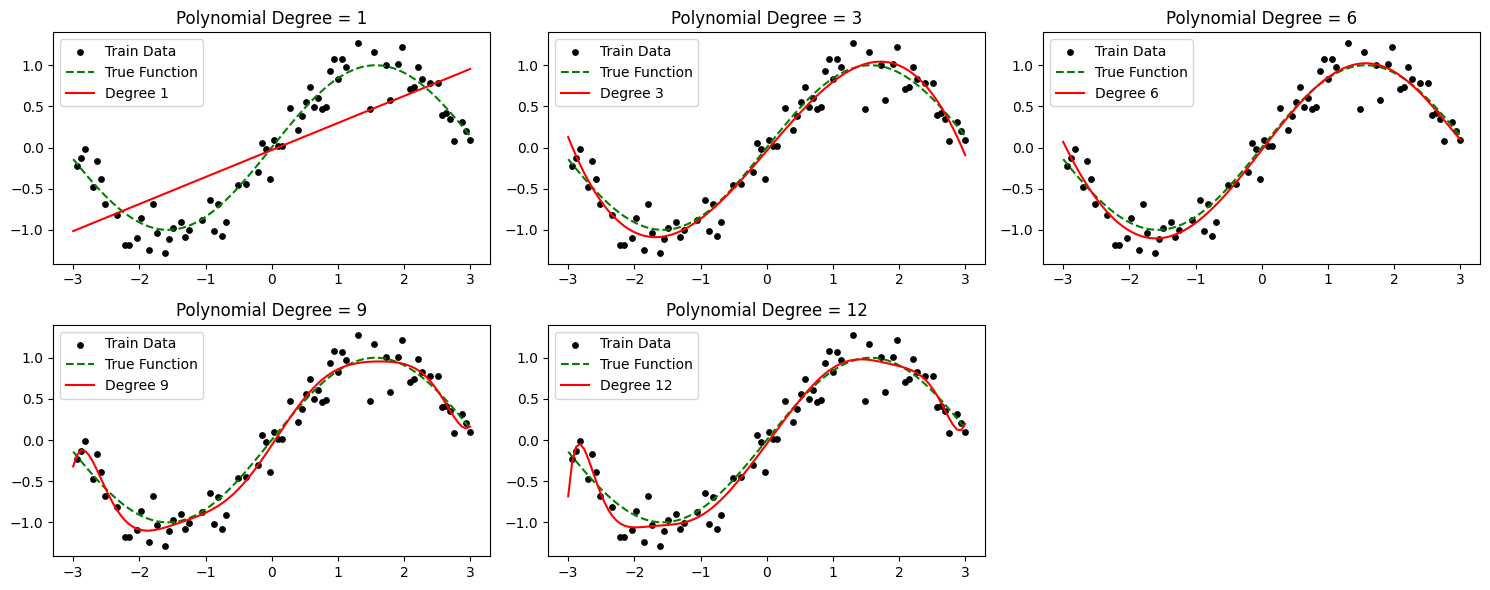

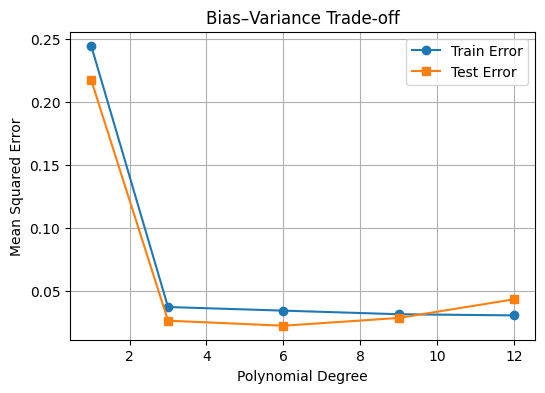

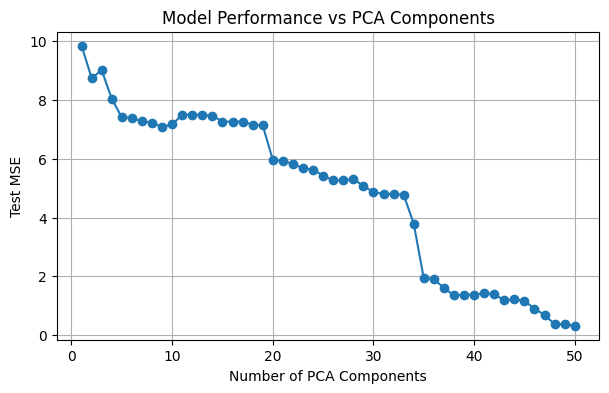

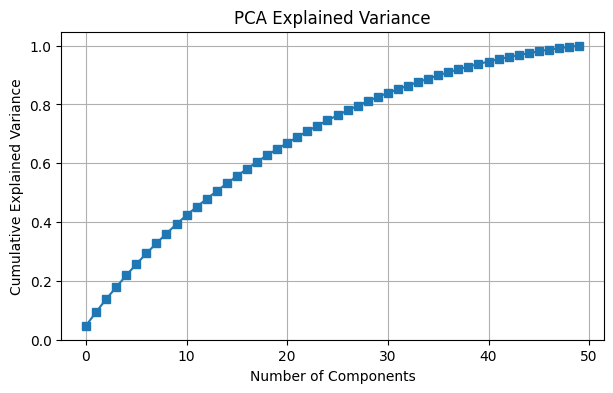

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import math

np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y_true = np.sin(X) + 0.2 * np.random.randn(100, 1)  # true function + noise

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=42)

degrees = [1, 3, 6, 9, 12]
train_errors, test_errors = [], []

plt.figure(figsize=(15, 6))

rows = 2
cols = math.ceil(len(degrees) / rows)

for i, d in enumerate(degrees, 1):
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_pred_train))
    test_errors.append(mean_squared_error(y_test, y_pred_test))

    # Dynamically handle subplot layout
    plt.subplot(rows, cols, i)
    plt.scatter(X_train, y_train, color='black', s=15, label="Train Data")
    plt.plot(X, np.sin(X), color='green', linestyle='--', label="True Function")
    plt.plot(X, model.predict(X), color='red', label=f"Degree {d}")
    plt.title(f"Polynomial Degree = {d}")
    plt.legend()

plt.tight_layout()
plt.show()

# Plot train/test MSE vs model complexity
plt.figure(figsize=(6, 4))
plt.plot(degrees, train_errors, 'o-', label="Train Error")
plt.plot(degrees, test_errors, 's-', label="Test Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Trade-off")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 3️⃣ PCA in High Dimensions
# -----------------------------
# Create a high-dimensional dataset (e.g., 50 features)
np.random.seed(42)
X_hd = np.random.randn(200, 50)
# Simulate a target related to a few true components
true_w = np.zeros(50)
true_w[:5] = [1.5, -2.0, 0.7, 1.0, -1.3]
y_hd = X_hd.dot(true_w) + 0.5 * np.random.randn(200)

# Split into train/test
X_train_hd, X_test_hd, y_train_hd, y_test_hd = train_test_split(X_hd, y_hd, test_size=0.3, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_hd)
X_test_pca = pca.transform(X_test_hd)

# Evaluate model performance for increasing PCA dimensions
dims = np.arange(1, 51)
mse_list = []

for d in dims:
    reg = LinearRegression()
    reg.fit(X_train_pca[:, :d], y_train_hd)
    y_pred = reg.predict(X_test_pca[:, :d])
    mse_list.append(mean_squared_error(y_test_hd, y_pred))

# Plot MSE vs number of PCA components
plt.figure(figsize=(7, 4))
plt.plot(dims, mse_list, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Test MSE")
plt.title("Model Performance vs PCA Components")
plt.grid(True)
plt.show()

# Visualize explained variance ratio
plt.figure(figsize=(7, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='s')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()
